<br>
<br>

# Fahrzeugklassifizierung

## Anwendung: Parkplatzzuweisung oder Durchfahrtsverbot im Parkhaus, Mautstelle

<br>

## Gruppenmitglieder:

### Jakob Bleickert: Bildverarbeitung
### Lukas Harzheim: Längenmessung
### Konstantin Paulus: Klassifizierung

<br>

## 1. Bildverarbeitung

### Vorstellung der Videos und Fahrzeuge

In [76]:
from IPython.display import HTML

HTML("""<video alt="test" controls width="720" src="../datasets/side_opel.mov"></video>""")

<br>

### Bibliotheken und Funktion der Bildverarbeitung

In [71]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def preprocessing(frame):
    
    global thresh
    
    blur = cv2.blur(frame,(5,5))                                            # filters
    blur0=cv2.medianBlur(blur,5)
    blur1= cv2.GaussianBlur(blur0,(5,5),0)
    blur2= cv2.bilateralFilter(blur1,9,75,75)

    hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)                            # color filter

    low = np.array([60, 50, 50])                                            # mask
    high = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, low, high)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)                            # gray picture
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)             # threshhold

    return thresh


<br>

### Extraktion und Analyse der Frames

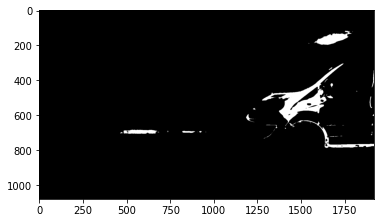

There are 53007 set to 255


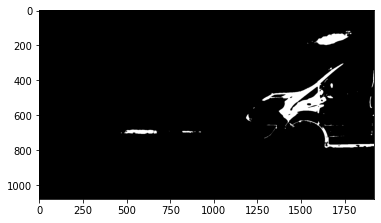

There are 52346 set to 255


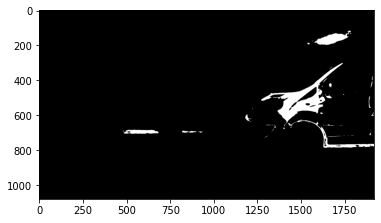

There are 53812 set to 255


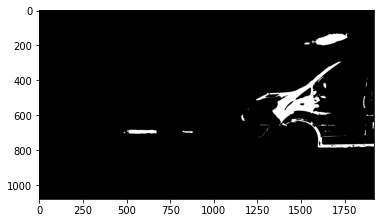

There are 58372 set to 255


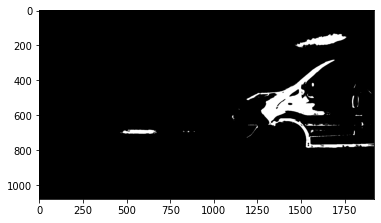

There are 69806 set to 255


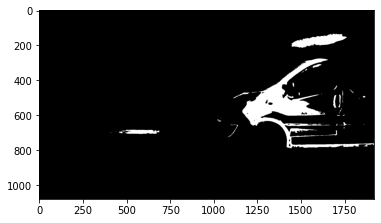

There are 94091 set to 255


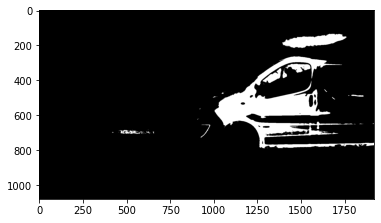

There are 152988 set to 255


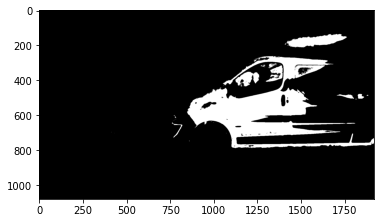

There are 204858 set to 255


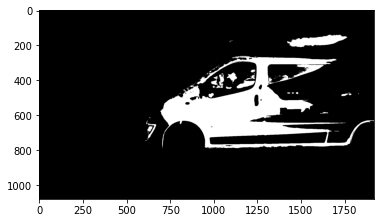

There are 240855 set to 255


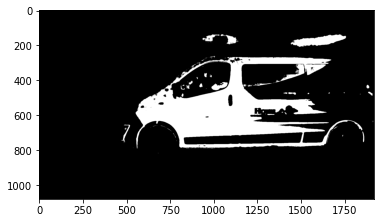

There are 273835 set to 255


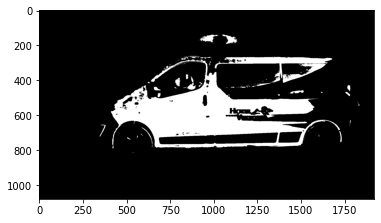

There are 278901 set to 255


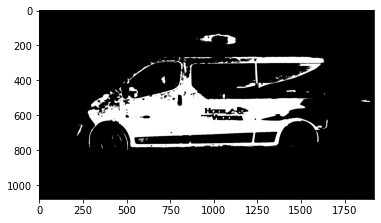

There are 281348 set to 255


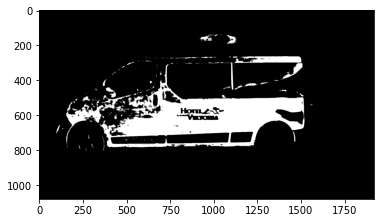

There are 240590 set to 255


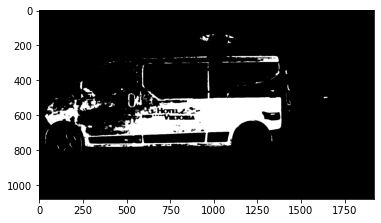

There are 192248 set to 255


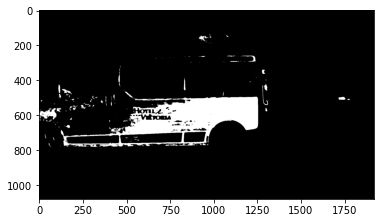

There are 145066 set to 255


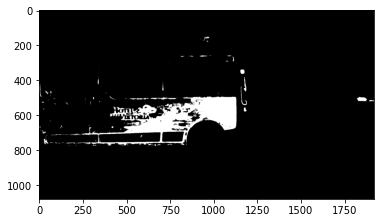

There are 100857 set to 255


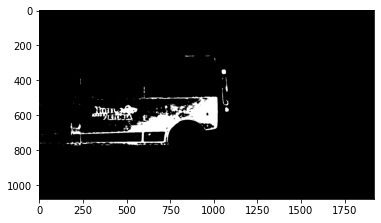

There are 73820 set to 255


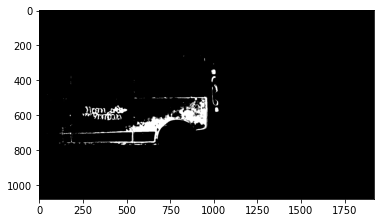

There are 45854 set to 255


In [75]:
cap = cv2.VideoCapture('../datasets/side_opel.mov')                     # capture

count = 0                                                                   # frames passed
x = []                                                                      # frame
y = []                                                                      # amount of pixels

while cap.isOpened():                                                       # for each frame
    ret, frame = cap.read()

    if ret:
        
        preprocessing(frame)
        plt.imshow(thresh, cmap='gray')
        plt.show()
    
        nonzero = np.count_nonzero(thresh)                                  # count nonzero pixels
        print(f'There are {nonzero} set to 255')

        x.append(count)                                                     # save values for plotting
        y.append(nonzero)
        
        count += 12                                                         # frames per second

        cap.set(1, count)                                                   # 21 frames ahead

    else:

        break


<br>

### Bewertung der Frames

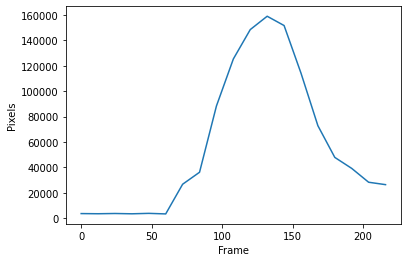

Maximum for Frame: 132


In [73]:
plt.plot(x, y)                                                              # plot nonzero pixels over frame
plt.ylabel('Pixels')
plt.xlabel('Frame')
plt.show()

a = np.array([x, y])                                                        # find maximum value and index in array
v = np.amax(a)
u = np.where(a == v)
final_frame = u [1][0] *12
print('Maximum for Frame:', final_frame)

<br>

### Ausgabe des finalen Frames

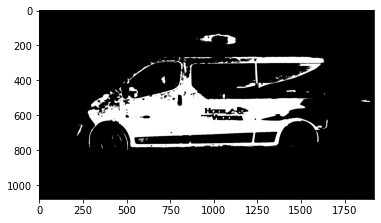

In [77]:
cap.set(1,final_frame)                                                      # extract final frame
ret, frame = cap.read()

preprocessing(frame)                                                        # preprocessing again
plt.imshow(thresh, cmap='gray')